In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("phone.csv")
phone.head(17)

In [ ]:
# Изменение существующих значений в столбцах

# Хотим увеличить цены на 10%
df['price'] = df['price'] * 1.1
print(df.head(54))

In [ ]:
# Добавление строк

# Создание новой строки для добавления
new_row = {'disk': 'SSD', 'os': 'Windows', 'price': 150, 'year': 2023}

# Добавление новой строки в DataFrame
df = df.append(new_row, ignore_index=True)
print(df.head(100))

 'usage_days', представляет случайное количество дней, которые пользователь проведет с каждым телефоном. Столбец 'end_of_usage_date', который представляет дату окончания использования каждого телефона, вычисленную путем добавления 'usage_days' к 'purchase_date'.

In [47]:
# Добавляем столбец с датой покупки и столбец с датой окончания использования
start_date = '2020-01-01'
end_date = '2024-01-01'
num_records = len(df)
df['purchase_date'] = pd.date_range(start=start_date, end=end_date, periods=num_records)
df['usage_days'] = np.random.randint(1, 365 * 3, size=num_records)  # Максимальное время пользования - 3 года
df['end_of_usage_date'] = df['purchase_date'] + pd.to_timedelta(df['usage_days'], unit='D')
df['purchase_date'] = df['purchase_date'].dt.floor('s')
df['end_of_usage_date'] = df['end_of_usage_date'].dt.floor('s') # округление


print(df)

    disk       os     price  year       purchase_date  usage_days  \
0     64  Android   8779.76  2016 2020-01-01 00:00:00         223   
1    128  Android   9223.83  2015 2020-01-15 18:10:54         593   
2     64  Android   2318.36  2010 2020-01-30 12:21:49         346   
3    512      iOS  18204.45  2017 2020-02-14 06:32:43         692   
4     16  Android   5418.38  2013 2020-02-29 00:43:38          97   
..   ...      ...       ...   ...                 ...         ...   
95   512      iOS  10161.58  2011 2023-11-02 23:16:21        1033   
96    64  Android   8708.37  2016 2023-11-17 17:27:16         310   
97    32  Android   6889.74  2014 2023-12-02 11:38:10         372   
98    32  Android   9182.69  2016 2023-12-17 05:49:05         781   
99   256      iOS  11534.93  2014 2024-01-01 00:00:00         635   

     end_of_usage_date  
0  2020-08-11 00:00:00  
1  2021-08-30 18:10:54  
2  2021-01-10 12:21:49  
3  2022-01-06 06:32:43  
4  2020-06-05 00:43:38  
..                 ..

In [ ]:
# Удаление строк
df = df[df['os'] != 'iOS']
print(df.head())

In [ ]:
# Заполнение пустых значений в DataFrame
df['price'].fillna(df['price'].mean(), inplace=True)
print(df.head(55))


In [ ]:
# Удаление дубликатов из DataFrame
df.drop_duplicates(inplace=True)
print(df.head())


In [ ]:

# Создаем список возможных значений
values = ['No', 'Yes']

# Создаем новый столбец с случайным выбором из этого списка для каждой строки
df['New'] = np.random.choice(values, size=len(df))
print(df)

In [ ]:
# Создаем список
values = ['No', 'Yes']
# Создаем новый столбец с случайным выбором из этого списка для каждой строки
df['New'] = np.random.choice(values, size=len(df))
print(df)

# Удаление столбца
if 'New' in df.columns:
    df.drop(columns=['New'], inplace=True)
else:
    print("Столбец 'New' не найден")
print(df)

In [40]:
# Фильтрация DataFrame с помощью метода query()
filtered_df = df.query('price > 100 and year == 2023')
print(filtered_df)


Empty DataFrame
Columns: [disk, os, price, year]
Index: []


In [38]:
# Фильтрация DataFrame по условию
filtered_df = df.loc[(df['price'] > 100) & (df['year'] == 2023)]
print(filtered_df)


Empty DataFrame
Columns: [disk, os, price, year]
Index: []


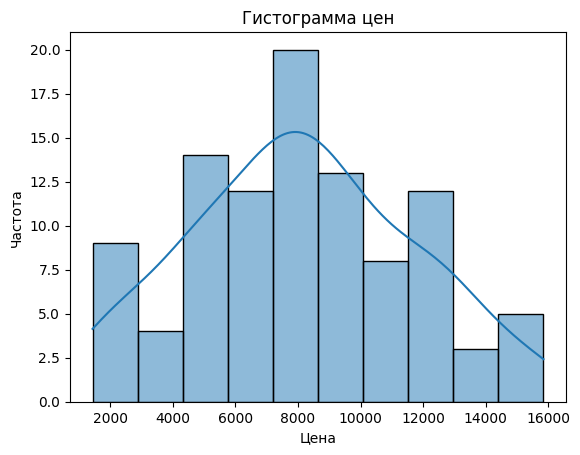

In [34]:
# Гистограмма для цен
sns.histplot(data=df, x='price', bins=10, kde=True)
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

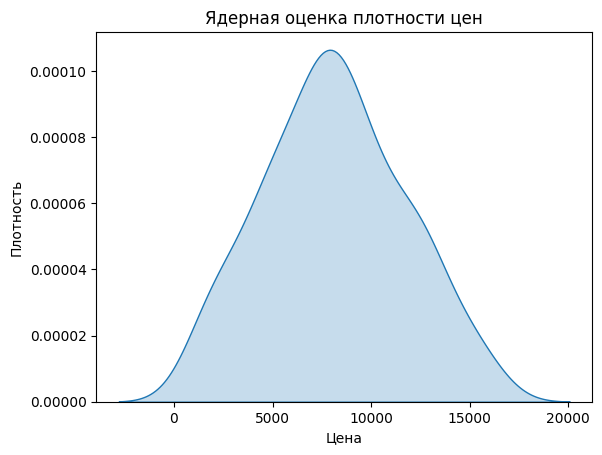

In [35]:
# График ядерной оценки плотности для цен
sns.kdeplot(data=df, x='price', fill=True)
plt.title('Ядерная оценка плотности цен')
plt.xlabel('Цена')
plt.ylabel('Плотность')
plt.show()

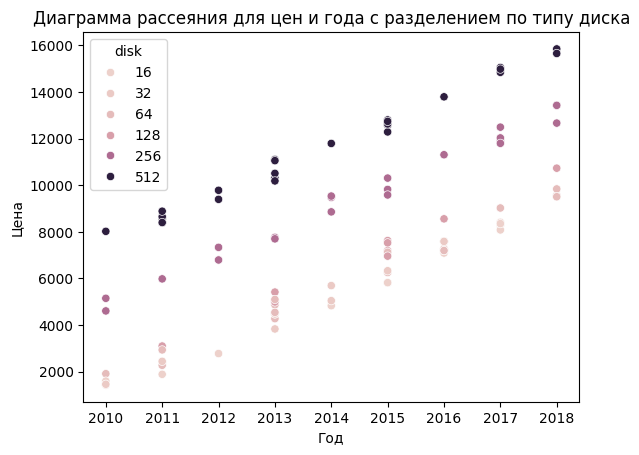

In [36]:
# Диаграмма рассеяния для цен и года
sns.scatterplot(data=df, x='year', y='price', hue='disk')
plt.title('Диаграмма рассеяния для цен и года с разделением по типу диска')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

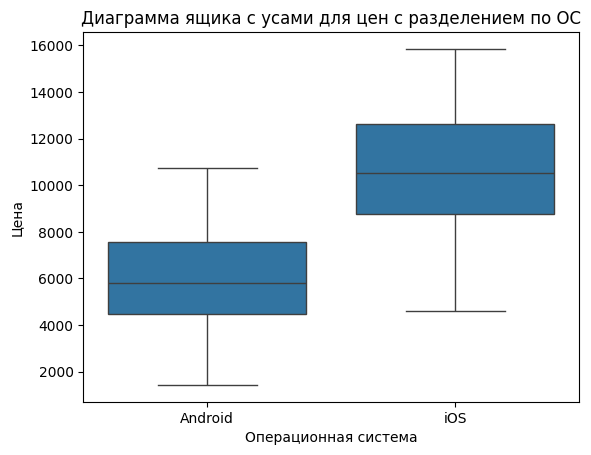

In [37]:
# Диаграмма ящика с усами для цен с разделением по ОС
sns.boxplot(data=df, x='os', y='price')
plt.title('Диаграмма ящика с усами для цен с разделением по ОС')
plt.xlabel('Операционная система')
plt.ylabel('Цена')
plt.show()